In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iris-flower-dataset/IRIS.csv


In [2]:
def plot_hist(arr, xlabel) :
    num_bins = np.ceil((max(arr) - min(arr)) / 
                       (2 * (np.percentile(arr, 75) - 
                             np.percentile(arr, 25)) / 
                        np.cbrt(len(arr))))
    plt.hist(arr, density=True, bins=int(num_bins))  
    plt.title(f'Distribution of {xlabel}')
    plt.show()

def plot_sne (X_tsne, y) :
    plt.figure(figsize=(8, 6))
    plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis', s=10)
    plt.title('t-SNE Visualization')
    plt.colorbar()
    plt.show()

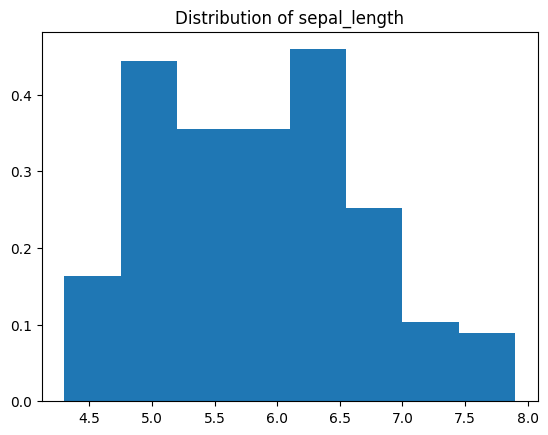

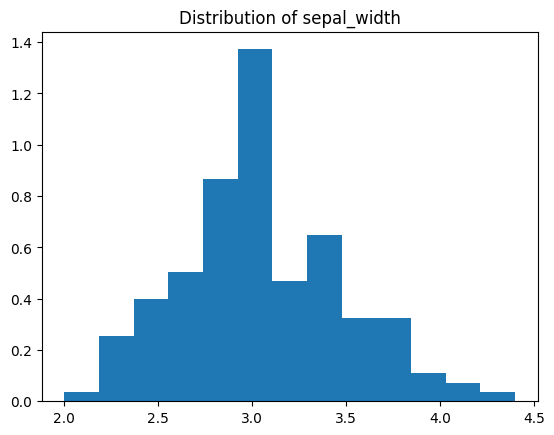

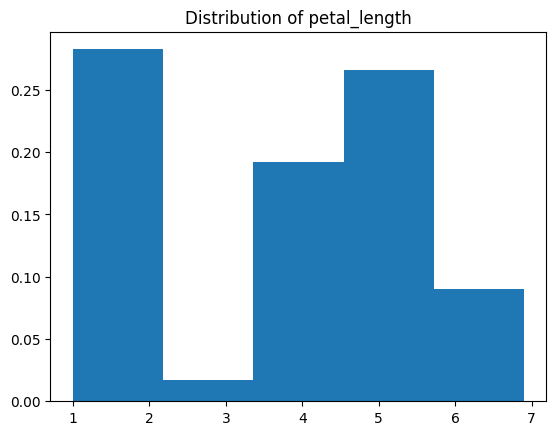

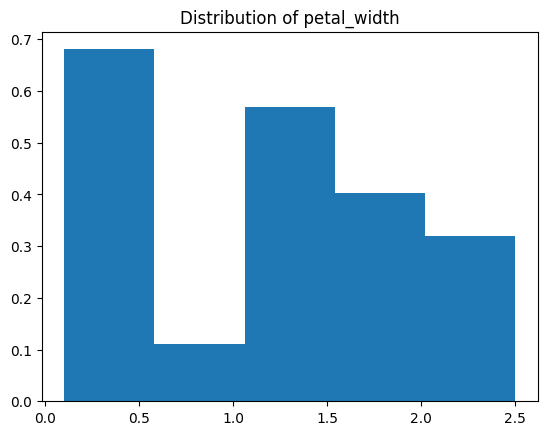

In [3]:
data = pd.read_csv('/kaggle/input/iris-flower-dataset/IRIS.csv')
columns = data.columns
X = np.array([data[i] for i in columns if i != 'species'])
y = []

for i in list(data['species']):
    if i == 'Iris-setosa' :
        y.append(0)
    elif i == 'Iris-versicolor':
        y.append(1)
    else:
        y.append(2)
y = np.array(y)

for i in range(X.shape[0]) :
    plot_hist(X[i, :], data.columns[i])

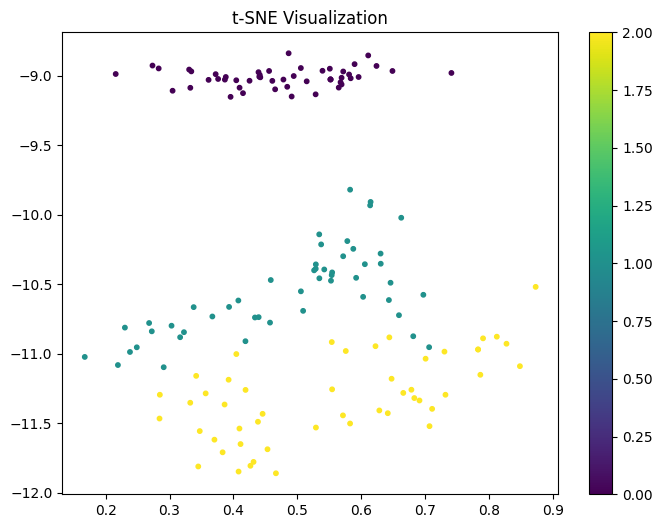

In [4]:
tsne = TSNE(n_components=2, random_state=42, perplexity=120)
X_tsne = tsne.fit_transform(X.T)

plot_sne (X_tsne, y)